In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
img_array = cv2.imread("train/Closed/_0.jpg", cv2.IMREAD_GRAYSCALE)

In [4]:
img_array

array([[ 82,  80,  77, ..., 129, 123, 124],
       [ 84,  83,  80, ..., 115, 114, 114],
       [ 84,  84,  82, ..., 109, 105, 109],
       ...,
       [101, 101, 100, ..., 110, 111, 110],
       [101, 101, 102, ..., 111, 111, 108],
       [101, 100, 102, ..., 111, 110, 108]], dtype=uint8)

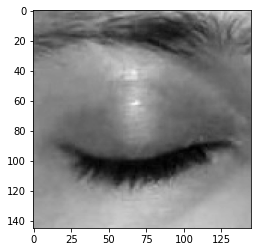

In [5]:
plt.imshow(img_array, cmap="gray")

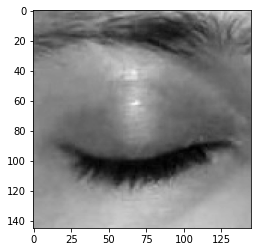

In [6]:
Datadirectory = "train"
Classes = ['Closed','Open']
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

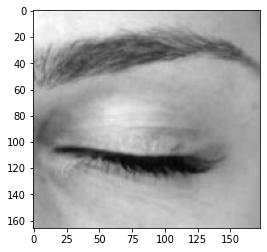

In [92]:
Datadirectorytest = "test"
Classes = ['Closed','Open']
for category in Classes:
    path = os.path.join(Datadirectorytest, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

### Reading all the images and converting them into an array and labels

In [7]:
training_Data = []
img_size = 224

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [97]:
testing_data = []

def create_testing_Data():
    for category in Classes:
        path = os.path.join(Datadirectorytest, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                testing_data.append([new_array, class_num])

In [98]:
create_testing_Data()

In [99]:
len(testing_data)

218

In [8]:
create_training_Data()

In [9]:
len(training_Data)

1234

In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [100]:
X_test = []
y_test = []

for features, label in training_Data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_Test = np.array(y_test)

In [101]:
pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [12]:
X.shape

(1234, 224, 224, 3)

In [13]:
# Normalize the data
X = X/255.0  # we are normalizing it 

In [14]:
Y = np.array(y)

In [15]:
import pickle

In [16]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

### Deep Learning model for training- Transfer Learning

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [87]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [104]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [105]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 222, 222, 64)      18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 220, 220, 128)     73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 110, 110, 128)     0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1548800)           0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 1548800)         

### Transfer Learning

base_input = model.layers[0].input  # input

base_output = model.layers[-4].output

flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)  # one code (1/0)
final_output = layers.Activation('sigmoid')(final_output)

new_model = keras.Model(inputs = base_input, outputs = final_output)

In [82]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 224, 224, 64)      9472      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 56, 56, 256)     

### Settings for binary classification(open/closed)

In [106]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
new_model.save('my_model.h5')